In [1]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3, 7)

import cv2 as cv
import numpy as np

# Make sure that OpenCV optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)
    
cv.useOptimized()

True

# Q3

In [2]:
import cv2

# Load the video
video_path = "img_pexels.mp4"
cap = cv2.VideoCapture(video_path)

# Get original video properties
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the desired smaller frame size
smaller_width = int(width / 2)
smaller_height = int(height / 2)

# Create a VideoWriter object to save the smaller frames
output_path = "smaller_img_pexels.avi"  # or "smaller_img_pexels.mp4"
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output_path, fourcc, fps, (smaller_width, smaller_height))

# Read and process each frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Resize the frame to the desired smaller size
    smaller_frame = cv2.resize(frame, (smaller_width, smaller_height))

    # Display the smaller frame
    cv2.imshow("Smaller Frame", smaller_frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    # Write the smaller frame to the output video file
    out.write(smaller_frame)

# Release the resources
cap.release()
out.release()
cv2.destroyAllWindows()

# Q4


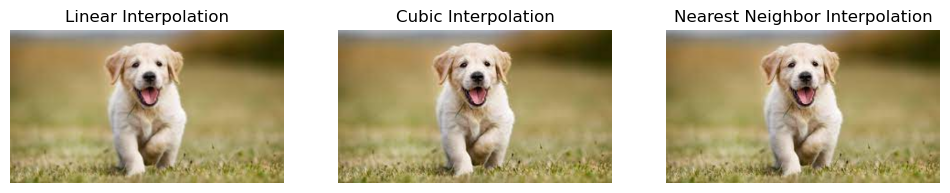

In [3]:
import cv2
import matplotlib.pyplot as plt

def upscale_image(image_path, interpolation_method):
    # Load the image
    image = cv2.imread(image_path)

    # Get the original image size
    original_height, original_width = image.shape[:2]

    # Define the target scaling factor for upscaling
    scale_factor = 2

    # Calculate the new image size after upscaling
    new_width = int(original_width * scale_factor)
    new_height = int(original_height * scale_factor)

    # Perform the upscaling using the specified interpolation method
    upscaled_image = cv2.resize(image, (new_width, new_height), interpolation=interpolation_method)

    return upscaled_image

if __name__ == "__main__":
    input_image_path = "dog.jfif"

    # Upscale the image using different interpolation methods
    upscaled_linear = upscale_image(input_image_path, interpolation_method=cv2.INTER_LINEAR)
    upscaled_cubic = upscale_image(input_image_path, interpolation_method=cv2.INTER_CUBIC)
    upscaled_nearest = upscale_image(input_image_path, interpolation_method=cv2.INTER_NEAREST)

    # Display the upscaled images using matplotlib
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(upscaled_linear, cv2.COLOR_BGR2RGB))
    plt.title("Linear Interpolation")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(upscaled_cubic, cv2.COLOR_BGR2RGB))
    plt.title("Cubic Interpolation")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(upscaled_nearest, cv2.COLOR_BGR2RGB))
    plt.title("Nearest Neighbor Interpolation")
    plt.axis('off')

    plt.show()
